**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variable**

In [2]:
TXT_FOLDER_REGION = "encode_e2g_benchmark"

## Import data

In [3]:
### set directory
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
dir(txt_fdiry)

[1] "K562.hg38.ENCODE_E2G.benchmark.bed.gz"
[2] "K562.hg38.ENCODE_E2G.benchmark.tsv"   
[3] "summary"

In [4]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname  = "description.tsv"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cnames = dat
fun_display_table(dat)

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Name given to a region; Use '.' if no name is assigned.
Score,Effect Size
Region,Region coordinate of the Region-Gene pair
Target,Gene of the Region-Gene pair
NLog10P,MinusLog10PValue; -log10 of P-value
Regulated,Regulated or not
Source,Reference


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname  = "K562.hg38.ENCODE_E2G.benchmark.bed.gz"
txt_fpath  = file.path(txt_fdiry, txt_fname)

### read table
vec = dat_cnames$Name
dat = read_tsv(txt_fpath, col_names = vec, show_col_types = FALSE)

### assign and show
dat_region_import = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 10375    12


Chrom,ChromStart,ChromEnd,Name,Score,Region,Target,NLog10P,Regulated,Source,Group,Label
chr1,3774714,3775214,CEP104|chr1:3691278-3691778:*,-0.2934319,chr1:3774714-3775214,CEP104,2.395344,TRUE,Ulirsch2016,E2G-Benchmark,Regulated:TRUE
chr1,3774714,3775214,LRRC47|chr1:3691278-3691778:*,-0.3311781,chr1:3774714-3775214,LRRC47,2.109514,TRUE,Ulirsch2016,E2G-Benchmark,Regulated:TRUE
chr1,3774714,3775214,SMIM1|chr1:3691278-3691778:*,-0.4720192,chr1:3774714-3775214,SMIM1,3.192703,TRUE,Ulirsch2016,E2G-Benchmark,Regulated:TRUE


## Explore data

### List Source

In [9]:
dat = dat_region_import
res = table(dat$Source)
dat = as.data.frame(res)
colnames(dat) = c("Source", "Count")

fun_display_table(dat)

Source,Count
Fulco2016,103
Fulco2019,3501
"Gasperini et al., 2019",5318
Huang2018,7
Klann2017,122
Qi2018,1
"Schraivogel et al., 2020",1306
Thakore2015,2
Ulirsch2016,5
Wakabayashi2016,3


### Count regulated

In [13]:
dat = dat_region_import
vec = dat$Regulated
dat = as.data.frame(table(vec))
colnames(dat) = c("Regulated", "Count")

print(length(vec))
fun_display_table(dat)

[1] 10375


Regulated,Count
FALSE,9903
TRUE,472


### Summary of p-values

**Summary**

In [24]:
dat = dat_region_import
lst = split(dat$NLog10P, dat$Regulated)
lst = lapply(lst, summary)
lst

$`FALSE`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
 0.00000  0.00004  0.01013  0.09843  0.06540 46.67349        1 

$`TRUE`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.304   2.114   4.168     Inf  10.081     Inf      16 


In [27]:
-log10(0.05)

[1] 1.30103

In [29]:
dat = dat_region_import
lst = split(dat$NLog10P, dat$Label)
vec = lst[["Regulated:FALSE"]]
sum(vec > 1.301, na.rm = TRUE)

[1] 75

**Plot distribution**

Warning message:
“Removed 18 rows containing non-finite outside the scale range (`stat_bin()`).”


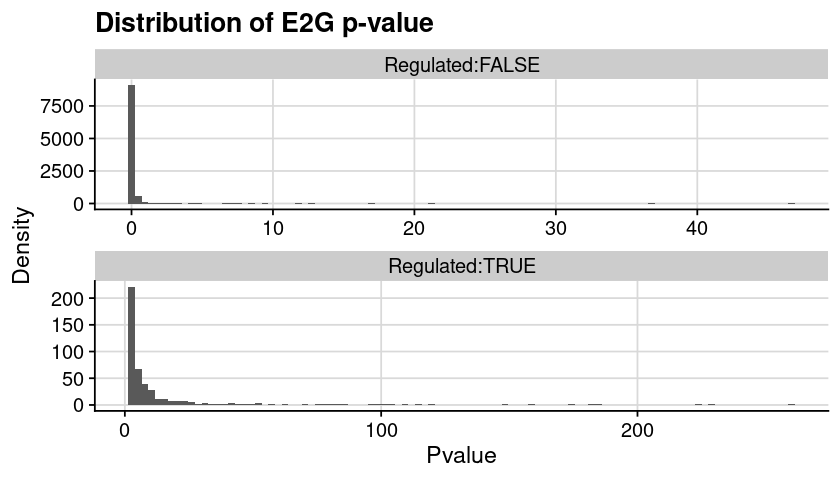

In [22]:
dat = dat_region_import

gpt = ggplot(dat, aes(x=NLog10P)) + 
    geom_histogram(bins = 100) + 
    theme_cowplot() +
    background_grid() +
    labs(
        x="Pvalue", 
        y="Density", 
        title="Distribution of E2G p-value") +
    facet_wrap(~Label, nrow=2, scales = "free")

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

### Distribution of scores

**Summary**

In [18]:
dat = dat_region_import
lst = split(dat$Score, dat$Regulated)
lst = lapply(lst, summary)
lst

$`FALSE`
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.183670 -0.023483 -0.003932 -0.002342  0.016487  0.371076 

$`TRUE`
      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-0.9320000 -0.1863497 -0.1031512 -0.1652387 -0.0688501 -0.0008226 


**Plot distribution**

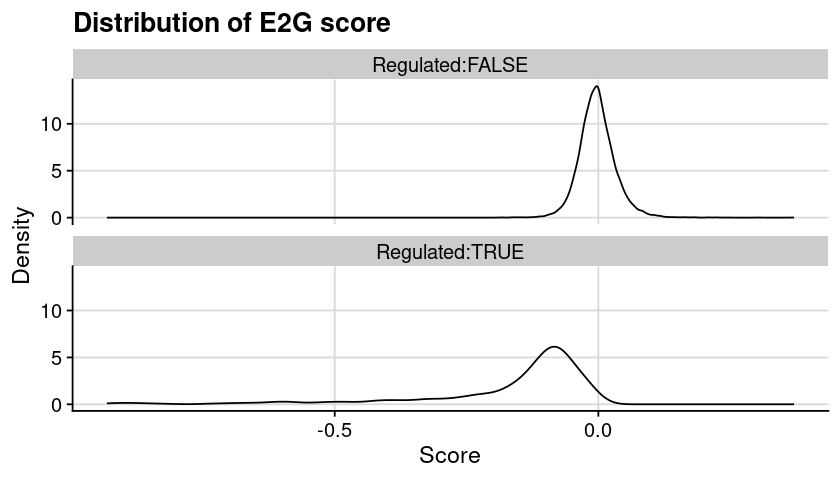

In [23]:
dat = dat_region_import

gpt = ggplot(dat, aes(x=Score)) + 
    geom_density() + 
    theme_cowplot() +
    background_grid() +
    labs(
        x="Score", 
        y="Density", 
        title="Distribution of E2G score") +
    facet_wrap(~Label, nrow=2)

options(repr.plot.height = 4, repr.plot.width = 7)
print(gpt)

## Save figures

**Helper function to get the mode of a continuous variable**

In [50]:
get_mode_continuous <- function(x, ...) {
    obj = density(x, ...)
    num = obj$x[which.max(obj$y)]
    return(num)
}

**Set plot style**

In [59]:
### set text size
theme_text = theme(
    title      = element_text(size = 16),
    axis.title = element_text(size = 15),
    axis.text  = element_text(size = 15),
    strip.text = element_text(size = 15, hjust = 0),
    strip.background = element_blank(),
)

**Summary**

In [65]:
### summarize the number of regions (total)
dat = dat_region_import
dat = dat %>%
    group_by(Label) %>%
    summarise(
        Count = n(), 
        Mode  = get_mode_continuous(Score),
        .groups="drop")

### label
vec = dat %>%
    dplyr::mutate(
        line1 = Label,
        line2 = paste("Count =", scales::comma(Count)),
        line3 = paste("Mode =", round(Mode, 2)),
        combined = paste0(line1, " (", line2, "; ", line3, ")")
    ) %>%
    { set_names(.$combined, .$Label) }

### assign and show
vec_txt_label = vec
print(vec_txt_label)

                             Regulated:FALSE 
 "Regulated:FALSE (Count = 9,903; Mode = 0)" 
                              Regulated:TRUE 
"Regulated:TRUE (Count = 472; Mode = -0.08)" 


**Plot**

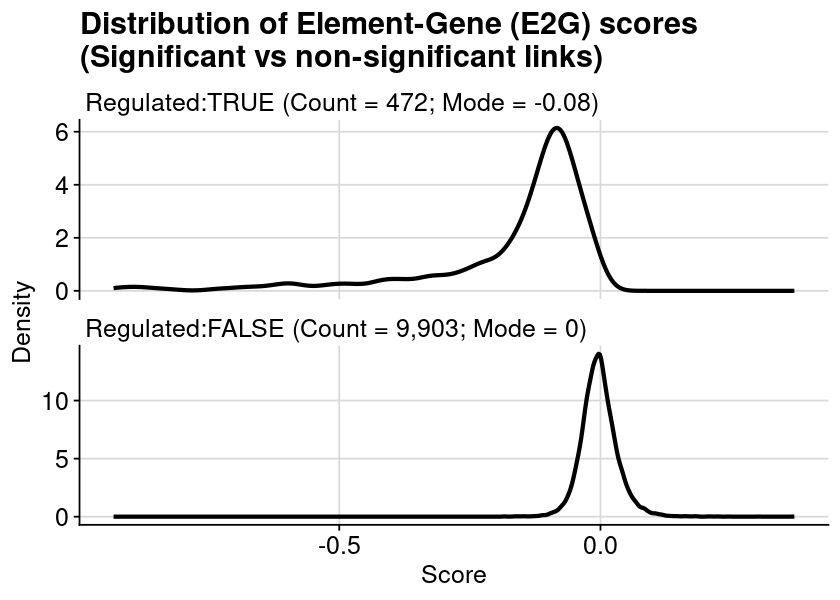

In [72]:
### init and relabel
dat = dat_region_import
vec = c("Regulated:TRUE", "Regulated:FALSE")
dat = dat %>% dplyr::mutate(Label = factor(Label, levels=vec))

### create plot
gpt = ggplot(dat, aes(x=Score)) + 
    geom_density(linewidth=1.2) + 
    theme_cowplot() +
    background_grid() +
    theme_text +
    labs(
        x="Score", 
        y="Density", 
        title="Distribution of Element-Gene (E2G) scores\n(Significant vs non-significant links)") +
    facet_wrap(
        ~Label, 
        nrow=2, 
        scales="free_y", 
        labeller = labeller(Label = vec_txt_label)
    )

### assign plot
gpt_export = gpt

### show plot
options(repr.plot.height = 5, repr.plot.width = 7)
print(gpt)

**Save**

In [73]:
### save plot: score distribution
plt_export = gpt_export

txt_fdiry = "./"
txt_fname = "fig.region.encode_e2g.distribution.score.png"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 7, units = "in")

txt_fdiry = "./"
txt_fname = "fig.region.encode_e2g.distribution.score.svg"
txt_fpath = file.path(txt_fdiry, txt_fname)
ggsave(txt_fpath, plt_export, height = 5, width = 7, units = "in")